In [1]:
pip install nltk scikit-learn


In [2]:
import nltk
import random
from nltk.corpus import movie_reviews
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


DOWNLOADING DATASET


In [3]:
nltk.download('movie_reviews')


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [5]:

documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]


random.shuffle(documents)


texts = [doc for doc, label in documents]
labels = [label for doc, label in documents]


TRAINING DATASET

In [6]:
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)


In [7]:

model = make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB())


model.fit(X_train, y_train)


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('multinomialnb', MultinomialNB())])

EVALUATE THE MODEL

In [8]:

y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8175
              precision    recall  f1-score   support

         neg       0.79      0.85      0.82       199
         pos       0.84      0.78      0.81       201

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



TEST WITH CUSTOM REVIEW

In [9]:
def predict_sentiment(review):
    pred = model.predict([review])[0]
    print(f"Sentiment: {pred}")

predict_sentiment("This movie was fantastic with great acting and plot.")
predict_sentiment("Worst film ever. Waste of time.")


Sentiment: pos
Sentiment: neg


SENTIMENT DISTRIBUTION

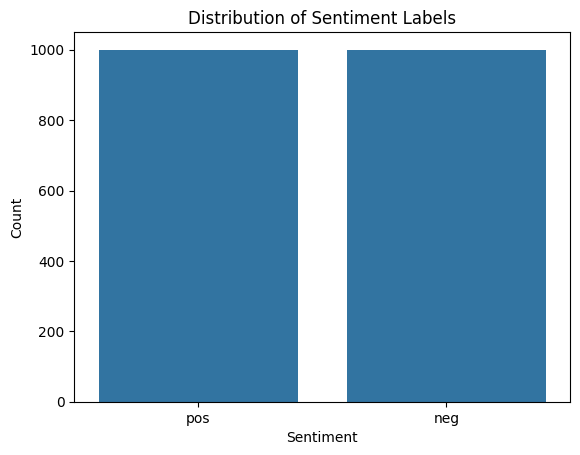

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=labels)
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


WORD COUNT-POSITIVE REVIEWS

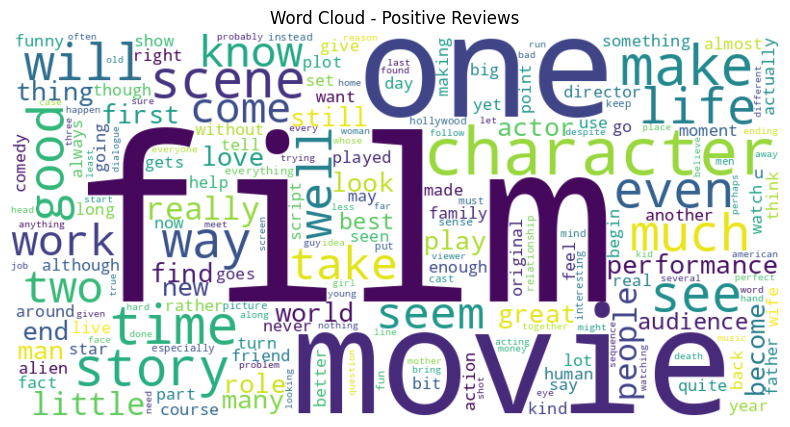

In [11]:
from wordcloud import WordCloud

positive_text = " ".join([doc for doc, label in documents if label == 'pos'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Reviews")
plt.show()


WORD COUNT-NEGATIVE REVIEWS

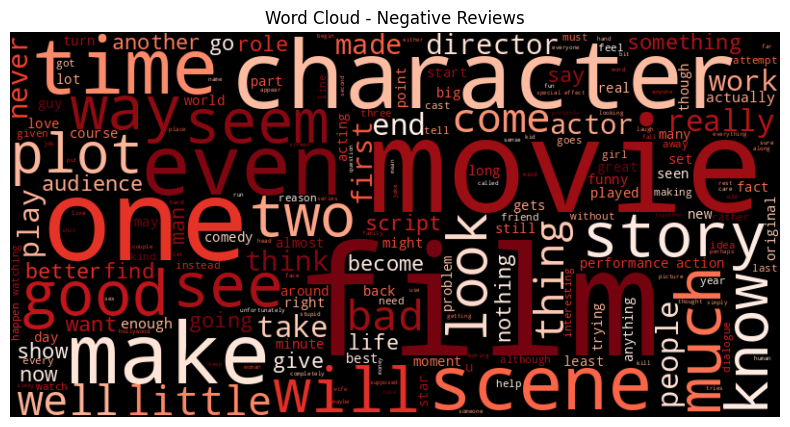

In [12]:
negative_text = " ".join([doc for doc, label in documents if label == 'neg'])
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Negative Reviews")
plt.show()


CONFUSION MATRIX

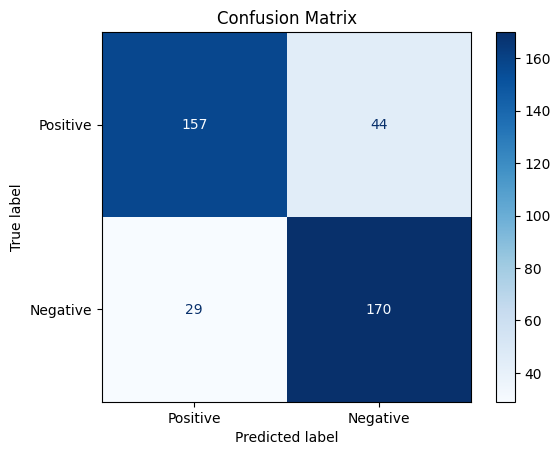

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=["pos", "neg"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


TOP POSITIVE AND NEGATIVE WORDS (BAR CHARTS)

/tmp/ipython-input-17-166400785.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette='pastel')


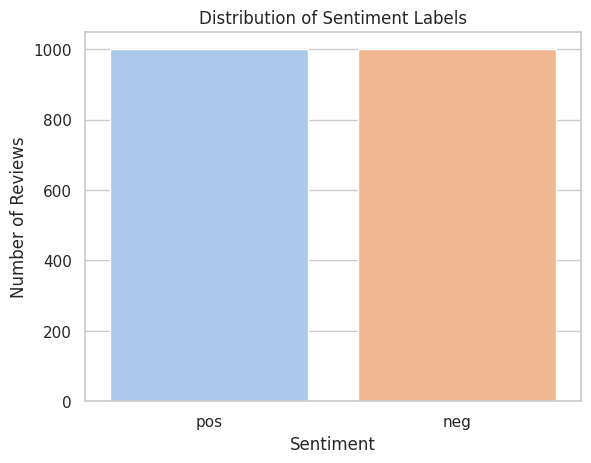

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.countplot(x=labels, palette='pastel')
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


ROC CURVE

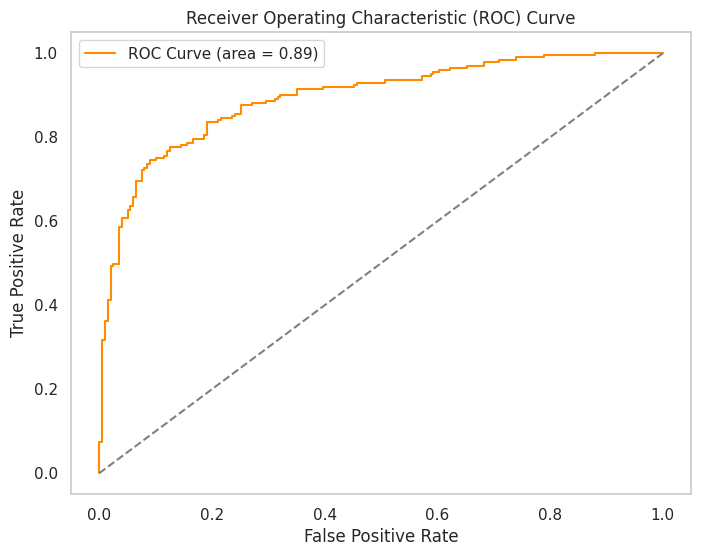

In [18]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_test_bin = [1 if label == 'pos' else 0 for label in y_test]
y_scores = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_bin, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()
